In [60]:
!pip install matplotlib numpy progressbar progressbar2
import os 
# Popen
from subprocess import Popen, PIPE
import matplotlib.pyplot as plt
import random
import sys 
import time
# np
import numpy as np
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

def permutations(string,digit):
#    output can be duplicate like AAAA or ABCD
    if digit == 1:
        return string
    else:
        return [y + x
                for y in permutations(string, 1)
                for x in permutations(string, digit - 1)]


In [61]:
# make function to plot graph by using stat
def plot_graph(stat,slot,colors,POPULATION_SIZE,MAX_GENERATIONS,CROSSOVER_RATE,MUTATION_RATE,PERMUTATION_RATE,INVERSION_RATE,WHITE_WEIGHT,BLACK_WEIGHT):
        result = [int(i) for i in stat]
        result_freq = {i:result.count(i) for i in result}
        x=result
        result_freq = {i:result.count(i) for i in result}
        plt.bar(list(result_freq.keys()),list(result_freq.values()))
        plt.xlabel("Number of Guess")
        plt.ylabel("Frequency")
        plt.title("Mastermind Genetic Algorithm")
        # X-axis show all number of guess
        plt.xticks(list(result_freq.keys()))
        # Pop is 40 
        # Gen is 120
        plt.text(1, 1200/5, f"Population: {POPULATION_SIZE} Generation: {MAX_GENERATIONS}")
        # Write all parameter
        plt.text(1, 1100/5, f"Crossover Rate: {CROSSOVER_RATE} Mutation Rate: {MUTATION_RATE}")
        plt.text(1, 1000/5, f"Permutation Rate: {PERMUTATION_RATE} Inversion Rate: {INVERSION_RATE}")
        plt.text(1, 900/5, f"White Weight: {WHITE_WEIGHT} Black Weight: {BLACK_WEIGHT}")
        # Write all result
        plt.text(1, 800/5, f"Max: {max(result):.2f}")
        plt.text(1, 700/5, f"Min: {min(result):.2f}")
        plt.text(1, 600/5, f"Mean: {sum(result)/len(result):.2f} Std: {np.std(x):.2f}")
        # get png file in folder
        path = os.getcwd()
        path = os.path.join(path,"image_result")
        files = os.listdir(path)
        files = [i for i in files if i.endswith(".png")]
        # sort by name
        files.sort()
        # get the largest number filename and get the number of file
        # With format plot_0001.png
        if len(files) == 0:
                filename = "plot_0001.png"
        else:
                filename = files[-1]
                filename = filename.split(".")[0]
                filename = filename.split("_")[1]
                filename = int(filename)
                filename += 1
                id = filename
                filename = f"plot_{filename:04d}.png"
        
        plt.savefig(os.path.join(path,filename))
        # open the image
        # open with default image viewer
        # os.system("open")
        # Write to CSV File
        # if not exist create new one
        if not os.path.exists("result.csv"):
                with open("result.csv","w") as f:
                        f.write("id,POPULATION_SIZE,MAX_GENERATIONS,CROSSOVER_RATE,MUTATION_RATE,PERMUTATION_RATE,INVERSION_RATE,WHITE_WEIGHT,BLACK_WEIGHT,max,min,mean,std\n")
        
        with open("result.csv","a") as f:
                f.write(f"{id},{POPULATION_SIZE},{MAX_GENERATIONS},{CROSSOVER_RATE},{MUTATION_RATE},{PERMUTATION_RATE},{INVERSION_RATE},{WHITE_WEIGHT},{BLACK_WEIGHT},{max(result):.2f},{min(result):.2f},{sum(result)/len(result):.2f},{np.std(x):.2f}\n")
        plt.show()
    


[=================== ] 99% 1295/1296 Time: 25.66 s

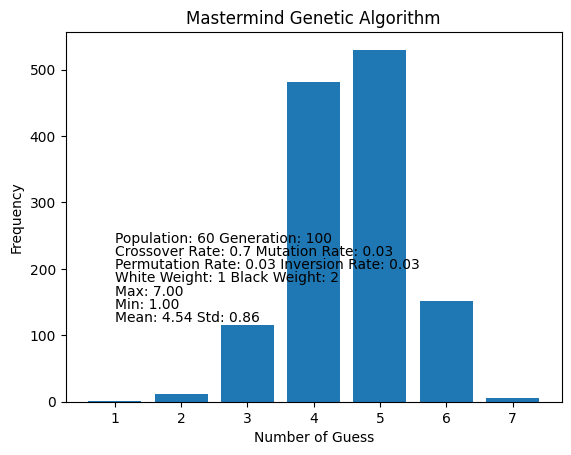

In [70]:
slot = 4
colors = 6
POPULATION_SIZE = 60
MAX_GENERATIONS = 100
CROSSOVER_RATE = 0.7
MUTATION_RATE = 0.03
PERMUTATION_RATE = 0.03
INVERSION_RATE = 0.03
WHITE_WEIGHT = 1
BLACK_WEIGHT = 2
testcase = permutations("".join([str(i) for i in range(colors)]),slot)
program_name = 'mastermind_ga_python_test'
first_guess = "1 1 2 3"
stat = []
# print(testcase)
error_testcase = []
# run gcc
os.system(f"gcc -o {program_name} {program_name}.c")
# shuffle testcase and get 1000 testcase
testcase = random.sample(testcase,len(testcase) if len(testcase) < 2000 else 2000)

start = time.time()
# run test
for(i,case) in enumerate(testcase):
    # print(f"Testcase {case}")
    p = Popen(['./'+program_name], stdin=PIPE, stdout=PIPE, stderr=PIPE)
    item = f"{slot} {colors} {POPULATION_SIZE} {MAX_GENERATIONS} {CROSSOVER_RATE} {MUTATION_RATE} {PERMUTATION_RATE} {INVERSION_RATE} {WHITE_WEIGHT} {BLACK_WEIGHT} {first_guess} {" ".join(case)} "
    item.replace(" ","\n")
    # print(item)
    stdout, stderr = p.communicate(item.encode())
    output = stdout.decode()
    # print(output)
    error = stderr.decode()
    stat.append(output)
    # Bar
    # print(f"Testcase {case} {i}/{len(testcase)}")
    # Print progress bar 
    sys.stdout.write('\r')
    now = time.time()
    sys.stdout.write("[%-20s] %d%%" % ('='*int(i/len(testcase)*20), int(i/len(testcase)*100)) + f" {i}/{len(testcase)} Time: {now-start:.2f} s" )
    sys.stdout.flush()
    
# after test delete program
os.system(f"rm {program_name}")
# test_stat is all information of test

plot_graph(stat,slot,colors,POPULATION_SIZE,MAX_GENERATIONS,CROSSOVER_RATE,MUTATION_RATE,PERMUTATION_RATE,INVERSION_RATE,WHITE_WEIGHT,BLACK_WEIGHT)
